# L001   IRIS データ


In [1]:
"""必要なライブラリ""";
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

Anaconda に標準で入っている機械学習ライブラリ scikit-learn (sklern) にはいくつかのサンプルデータを読み込むメソッドがあります。

今回はそのうちのひとつ、IRIS＝　アヤメの花のデータを使ってみます。

-[scikit-learn に付属しているデータセット](https://goo.gl/Ebqu34)


In [2]:
# IRISデータの読み込み
from sklearn.datasets import load_iris
iris = load_iris()

iris という変数に代入されるのは 一種のpython のdict（辞書）型のデータです。

In [3]:
print(iris.keys())

dict_keys(['DESCR', 'target_names', 'target', 'feature_names', 'data'])


In [4]:
dir(iris)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

- data  生データ
- target 分類番号（iris の場合、0〜3 で表現)
- target_names  分類名称
- DESCR データのメタ情報
- feature_names 特徴の名称

例えば、生データそのものの３番（０から始まるので４つ目）を参照したければ、 **iris['data'][3]** または、**iris.data[3]**で参照できます。
生データと分類番号の 先頭５つを表示してみましょう。

In [5]:
iris['data'][:5], iris.target[:5]

(array([[ 5.1,  3.5,  1.4,  0.2],
        [ 4.9,  3. ,  1.4,  0.2],
        [ 4.7,  3.2,  1.3,  0.2],
        [ 4.6,  3.1,  1.5,  0.2],
        [ 5. ,  3.6,  1.4,  0.2]]), array([0, 0, 0, 0, 0]))

このままプログラムで使ってもいいですが、こういう表形式のデータを扱うには、pandas が便利です。

In [6]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head() # head(n) で先頭から n 個を取り出せる

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


項目見出しを日本語に変えましょう。

In [7]:
df.columns = ['がく片の長さ','がく片の幅','花片の長さ','花片の幅']
df.head()

,がく片の長さ,がく片の幅,花片の長さ,花片の幅
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


特定の列だけを取り出す

In [8]:
X = df[['がく片の長さ','花片の長さ']]
X.head()

,がく片の長さ,花片の長さ
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


項目名は長くて面倒という場合は、行や列の番号で抽出する部分を指定することもできます。

In [9]:
X = df.iloc[2:5,[1,3]]
X

,がく片の幅,花片の幅
2,3.2,0.2
3,3.1,0.2
4,3.6,0.2


pandas では、index は保存されます。番号を振り直すこともできますが、ここでは述べません。
がく片の長さと幅の関係をグラフ化してみようと思います。まずは必要なデータを取り出した変数を作りましょう。

# 課題
花弁の長さと幅を抜き出したデータを変数 K に代入し、Kの上から５つ分を head() で表示しみなさい。

In [10]:
K = df.iloc[:,[2,3]]
K.head()

,花片の長さ,花片の幅
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [11]:
X = df.iloc[:, :2]  
y = iris.target

大抵の場合、pandas のデータフレームの列は numpy の１次元データの様に扱えます。

In [12]:
x1_min, x1_max  = X['がく片の長さ'].min()-0.5,  X['がく片の長さ'].max()+0.5
x2_min, x2_max = X['がく片の幅'].min()-0.5,  X['がく片の幅'].max()+0.5
(x1_min, x1_max), (x2_min, x2_max )

((3.7999999999999998, 8.4000000000000004), (1.5, 4.9000000000000004))

0.5 はグラフ化するときのマージン分です。
# 課題
花片の長さをx3,、幅をx4 として同様に min, max を定義しなさい

In [13]:
x3_min, x3_max  = K['花片の長さ'].min()-0.5,  K['花片の長さ'].max()+0.5
x4_min, x4_max = K['花片の幅'].min()-0.5,  K['花片の幅'].max()+0.5
(x3_min, x3_max), (x4_min, x4_max )

((0.5, 7.4000000000000004), (-0.40000000000000002, 3.0))

# 課題３
次のプログラムは各項目の関係をグラフ化して表示するプログラムである。
４項目あるので横軸に何をとるか、縦軸に何をとるかで４×３＝１２通りのグラフが描ける。
「がく片の長さと幅の関係」を参考にして、花片の長さと幅、がく片の長さと花片の長さ、がく片の幅と花片の幅の関係をグラフ化しなさい。

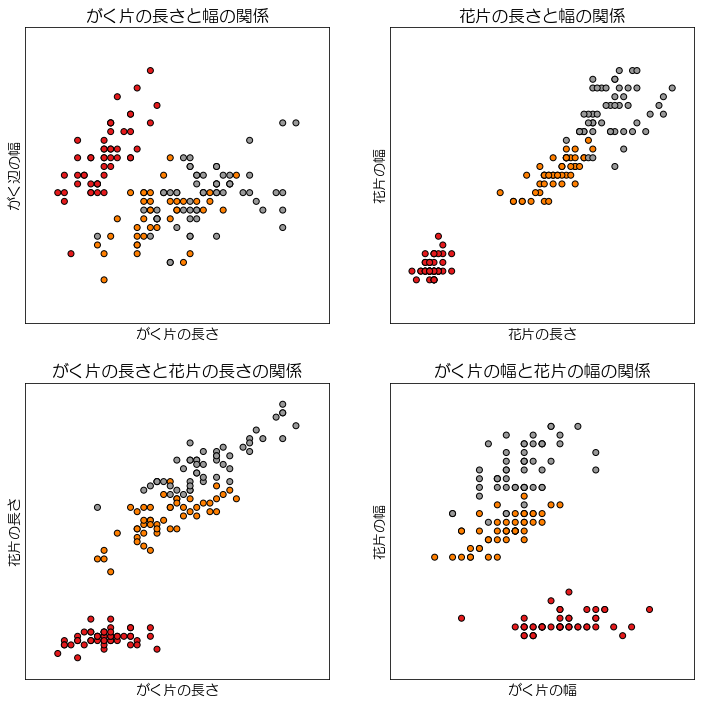

In [23]:
# 新規のウィンドウを描画
fig = plt.figure(figsize=(12, 12) )
plt.clf()
plt.rcParams['font.family'] = 'HGMaruGothicMPRO'  # 日本語フォントを指定　やらないと□になる
# フォントがない場合は、こちらからttfをダウンロードしてインストールせよ。　　http://ipafont.ipa.go.jp/old/ipafont/download.html
plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams['font.size'] = 14 #フォントサイズを設定 default : 12
plt.rcParams['xtick.labelsize'] = 15 # 横軸のフォントサイズ
plt.rcParams['ytick.labelsize'] = 15

# サブプロットを追加
ax1 = fig.add_subplot(2,2,1)
ax1.scatter(X['がく片の長さ'], X['がく片の幅'], c=y, cmap=plt.cm.Set1, edgecolor='k')

plt.xlabel('がく片の長さ')
plt.ylabel('がく辺の幅')
plt.title('がく片の長さと幅の関係')
plt.xlim(x1_min, x1_max)  # ｘ軸の最小と最大の指定
plt.ylim(x2_min, x2_max)  # y軸の最小と最大の指定
plt.xticks(()) # メモリはつけない、という意味
plt.yticks(())
#
ax2 =  fig.add_subplot(2,2,2)
ax2.scatter(K['花片の長さ'], K['花片の幅'], c=y, cmap=plt.cm.Set1, edgecolor='k')

plt.xlabel('花片の長さ')
plt.ylabel('花片の幅')
plt.title('花片の長さと幅の関係')
plt.xlim(x3_min, x3_max)  # ｘ軸の最小と最大の指定
plt.ylim(x4_min, x4_max)  # y軸の最小と最大の指定
plt.xticks(()) # メモリはつけない、という意味
plt.yticks(())
# 
ax3 =  fig.add_subplot(2,2,3)
ax3.scatter(X['がく片の長さ'], K['花片の長さ'], c=y, cmap=plt.cm.Set1, edgecolor='k')

plt.xlabel('がく片の長さ')
plt.ylabel('花片の長さ')
plt.title('がく片の長さと花片の長さの関係')
plt.xlim(x1_min, x1_max)  # ｘ軸の最小と最大の指定
plt.ylim(x3_min, x3_max)  # y軸の最小と最大の指定
plt.xticks(()) # メモリはつけない、という意味
plt.yticks(())
# 
ax4 =  fig.add_subplot(2,2,4)
ax4.scatter(X['がく片の幅'], K['花片の幅'], c=y, cmap=plt.cm.Set1, edgecolor='k')

plt.xlabel('がく片の幅')
plt.ylabel('花片の幅')
plt.title('がく片の幅と花片の幅の関係')
plt.xlim(x2_min, x2_max)  # ｘ軸の最小と最大の指定
plt.ylim(x4_min, x4_max)  # y軸の最小と最大の指定
plt.xticks(()) # メモリはつけない、という意味
plt.yticks(())

plt.show()

- [iris データ](https://en.wikipedia.org/wiki/Iris_flower_data_set)

- [Matplotlib.pyplotのplotの全引数を解説](http://own-search-and-study.xyz/2016/08/08/matplotlib-pyplot%E3%81%AEplot%E3%81%AE%E5%85%A8%E5%BC%95%E6%95%B0%E3%82%92%E4%BD%BF%E3%81%84%E3%81%93%E3%81%AA%E3%81%99/[()

- [The Iris Dataset](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)


http://qiita.com/danpansa/items/29cea2b14c0e4db237f8

http://blog.kaggle.com/2015/04/22/scikit-learn-video-3-machine-learning-first-steps-with-the-iris-dataset/  

![](http://5047-presscdn.pagely.netdna-cdn.com/wp-content/uploads/2015/04/iris_petal_sepal.png)

In [19]:
import matplotlib
font_paths = matplotlib.font_manager.findSystemFonts()
font_objects = matplotlib.font_manager.createFontList(font_paths)
font_name = [f.name for f in font_objects]

mincho = [name for name in font_name if 'mincho' in name.lower()]
gothic = [name for name in font_name if 'gothic' in name.lower()]
print("明朝系フォント",mincho)
print("ゴシック系フォント",gothic)

明朝系フォント ['IPAPMincho', 'Yu Mincho', 'Yu Mincho', 'IPAMincho', 'Yu Mincho']
ゴシック系フォント ['Franklin Gothic Medium', 'Century Gothic', 'Franklin Gothic Demi', 'Showcard Gothic', 'Malgun Gothic', 'HGMaruGothicMPRO', 'Franklin Gothic Book', 'Century Gothic', 'Copperplate Gothic Light', 'Franklin Gothic Heavy', 'Franklin Gothic Medium Cond', 'IPAPGothic', 'Franklin Gothic Heavy', 'IPAGothic', 'Century Gothic', 'Franklin Gothic Heavy', 'Century Gothic', 'Copperplate Gothic Light', 'Century Gothic', 'Franklin Gothic Medium', 'Franklin Gothic Demi Cond', 'Franklin Gothic Heavy', 'Malgun Gothic', 'Franklin Gothic Medium Cond', 'Copperplate Gothic Bold', 'Malgun Gothic', 'HGMaruGothicMPRO', 'Century Gothic', 'Franklin Gothic Book', 'Franklin Gothic Book', 'Franklin Gothic Book', 'Century Gothic', 'Copperplate Gothic Bold', 'Showcard Gothic', 'Franklin Gothic Demi Cond', 'Franklin Gothic Demi', 'Century Gothic', 'Franklin Gothic Demi', 'Franklin Gothic Demi']


In [16]:
K

,花片の長さ,花片の幅
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
5,1.7,0.4
6,1.4,0.3
7,1.5,0.2
8,1.4,0.2
9,1.5,0.1
